# DETECTING SPAM EMAILS USING NAIVE BAYES

# PROBLEM STATEMENT

- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.


## STEP 0 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 1 Importing Data

In [2]:
df=pd.read_csv("emails.csv")

In [3]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
df.tail(5)

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## STEP 2 Visualise Dataset


In [7]:
ham = df[df['spam']==0]

In [8]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [9]:
spam = df[df['spam']==1]

In [10]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [11]:
print("Spam percentage = ",len(spam)/len(df)*100 ,"%")

Spam percentage =  23.88268156424581 %


In [12]:
print("Ham percentage = ",len(ham)/len(df)*100 ,"%")

Ham percentage =  76.11731843575419 %


In [13]:
df['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

<Axes: ylabel='count'>

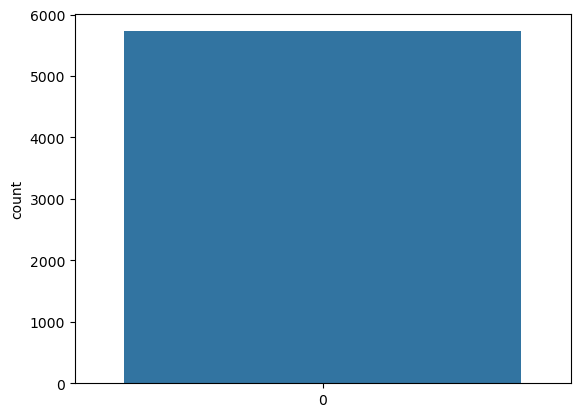

In [14]:
sns.countplot(df['spam'])

## STEP 3 Creating test and train data and data cleaning 

## Cleaning the data, removing stop words and punctuations

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
Test = 'Hello Mr. Future, I am so happy to be learning AI now!!'

In [17]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'w']

In [18]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

In [19]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# You have to download stopwords Package to eaaxecute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [23]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['Hello', 'Mr', 'Future', 'happy', 'learning', 'AI']

In [24]:
# Now we can apply count vectoriser

## Count Vectoriser 

### Translating words to numbers 

#### Example= 

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']


#Translating all these texts to numbers using CountVectoriser 


sample_vector=CountVectorizer()




In [26]:
X=sample_vector.fit_transform(sample_data)
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [27]:
sample_vector.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

## Applying to our dataset

In [28]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: 
#(1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [29]:
# Let's test the newly added function
df_clean = df['text'].apply(message_cleaning)

In [30]:
print(df_clean[0])

['Subject', 'naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'efforts', 'become', 'much', 'effective', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'drafts', 'within', 'three', 'business', 'days', 

In [31]:
print(df['text'][0])

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

In [32]:
from sklearn.feature_extraction.text import CountVectorizer 

vectorizer = CountVectorizer(analyzer = message_cleaning) #adding the cleaning pipeline to it
spamham_countvectorizer = vectorizer.fit_transform(df['text'])

In [33]:
vectorizer.get_feature_names_out()

array(['\x01', '\x02', '\x03', ..., 'zzn', 'zzncacst', 'zzzz'],
      dtype=object)

In [34]:
spamham_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
spamham_countvectorizer.shape
#37,303 words !

(5728, 37229)

## STEP 4 Training the Model

In [36]:
#NAIVE BAYES CLASSIFIER 

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
label=df['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [39]:
label.shape

(5728,)

In [40]:
model=MultinomialNB()

model.fit(spamham_countvectorizer,label)

MultinomialNB()

In [41]:
test_sample=['Free MoneY!','Hi Sia, Please let me know! Thanks']

In [47]:
test_sample_vector=vectorizer.fit_transform(test_sample)

test_sample_vector.shape

(2, 7)

In [72]:
print(test_sample_vector)

  (0, 0)	1
  (0, 2)	1
  (1, 1)	1
  (1, 3)	1
  (1, 6)	1
  (1, 5)	1
  (1, 4)	1


In [48]:
test_predict=model.predict(test_sample_vector)

ValueError: X has 7 features, but MultinomialNB is expecting 37229 features as input.

## STEP 4.1 Using actual test and train data

In [49]:
X=spamham_countvectorizer
y=label
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [50]:
from sklearn.naive_bayes import MultinomialNB
NB_model=MultinomialNB()
NB_model.fit(X_train,y_train)



MultinomialNB()

## STEP 5 Evaluating the Model

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
X_train.shape

(4582, 37229)

In [71]:
X_test.shape

(1146, 37229)

In [52]:
y_predict_train=NB_model.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

<Axes: >

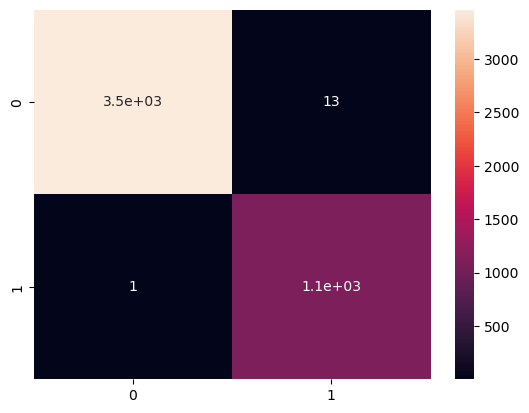

In [53]:
cm=confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm,annot=True)

In [54]:
y_predict_test=NB_model.predict(X_test)
y_predict_test

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

<Axes: >

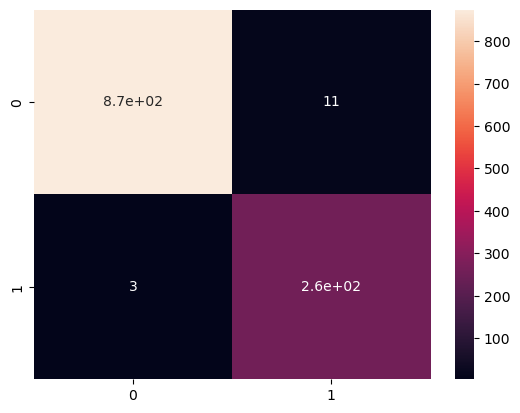

In [55]:
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [56]:
 
print("Classification Report on testing data \n",classification_report(y_test,y_predict_test))

Classification Report on testing data 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       885
           1       0.96      0.99      0.97       261

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



# STEP #6: LET'S ADD ADDITIONAL FEATURE TF-IDF

- Tf–idf stands for "Term Frequency–Inverse Document Frequency" is a numerical statistic used to reflect how important a word is to a document in a collection or corpus of documents. 
- TFIDF is used as a weighting factor during text search processes and text mining.
- The intuition behing the TFIDF is as follows: if a word appears several times in a given document, this word might be meaningful (more important) than other words that appeared fewer times in the same document. However, if a given word appeared several times in a given document but also appeared many times in other documents, there is a probability that this word might be common frequent word such as 'I' 'am'..etc. (not really important or meaningful!).


- TF: Term Frequency is used to measure the frequency of term occurrence in a document: 
    - TF(word) = Number of times the 'word' appears in a document / Total number of terms in the document
- IDF: Inverse Document Frequency is used to measure how important a term is: 
    - IDF(word) = log_e(Total number of documents / Number of documents with the term 'word' in it).

- Example: Let's assume we have a document that contains 1000 words and the term “John” appeared 20 times, the Term-Frequency for the word 'John' can be calculated as follows:
    - TF|john = 20/1000 = 0.02

- Let's calculate the IDF (inverse document frequency) of the word 'john' assuming that it appears 50,000 times in a 1,000,000 million documents (corpus). 
    - IDF|john = log (1,000,000/50,000) = 1.3

- Therefore the overall weight of the word 'john' is as follows 
    - TF-IDF|john = 0.02 * 1.3 = 0.026

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer

emails_tfidf = TfidfTransformer().fit_transform(spamham_countvectorizer)
print(emails_tfidf.shape)

(5728, 37229)


In [58]:
print(emails_tfidf[:,:])
# Sparse matrix with all the values of IF-IDF

  (0, 36565)	0.06908944889543289
  (0, 36432)	0.06757047739651872
  (0, 36430)	0.059679365326344706
  (0, 36025)	0.1319392730989776
  (0, 35034)	0.05233428188145157
  (0, 34800)	0.09384305652743173
  (0, 33562)	0.06921203533637368
  (0, 33037)	0.09490328795519132
  (0, 32843)	0.06073679014431701
  (0, 32617)	0.11152518721878715
  (0, 32602)	0.11962021118089677
  (0, 32319)	0.11962021118089677
  (0, 32263)	0.0789584619498058
  (0, 31968)	0.11850864343422601
  (0, 31959)	0.08499360588016656
  (0, 31547)	0.10454173100334828
  (0, 30218)	0.04607380847274443
  (0, 29858)	0.09333645170409068
  (0, 28879)	0.07691781511072393
  (0, 28266)	0.09213153238881405
  (0, 28110)	0.11014658587128429
  (0, 27986)	0.06591875520600377
  (0, 27225)	0.0732875367149963
  (0, 27224)	0.05761542024424838
  (0, 27122)	0.11082209685254277
  :	:
  (5727, 7921)	0.04309622276800823
  (5727, 7842)	0.09382800880629484
  (5727, 7841)	0.08777996676891853
  (5727, 5729)	0.5517795052228944
  (5727, 5629)	0.023897736992445

<Axes: >

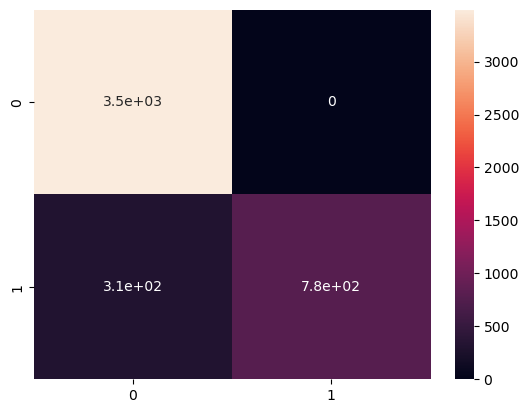

In [59]:
X = emails_tfidf
y = label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [60]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       870
           1       0.20      0.20      0.20       276

    accuracy                           0.62      1146
   macro avg       0.48      0.48      0.48      1146
weighted avg       0.62      0.62      0.62      1146



## Trying Guassian Naive Bayes 

In [61]:
from sklearn.naive_bayes import GaussianNB
GNB_model=GaussianNB()

In [62]:
spamham_countvectorizer

<5728x37229 sparse matrix of type '<class 'numpy.int64'>'
	with 565908 stored elements in Compressed Sparse Row format>

In [63]:
GNB_model.fit(X_train.toarray(),y_train)

GaussianNB()

In [64]:
y_predict_train_GNB=GNB_model.predict(X_train.toarray())
y_predict_train_GNB

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

<Axes: >

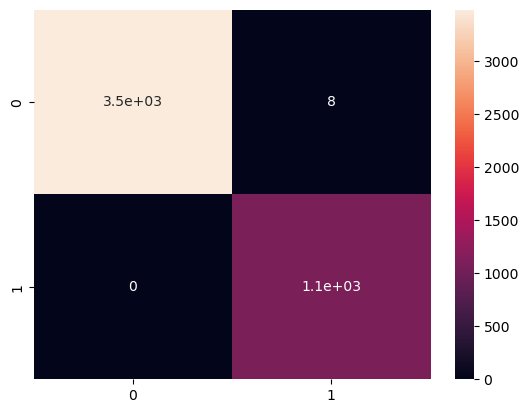

In [65]:
cm=confusion_matrix(y_train,y_predict_train_GNB)
sns.heatmap(cm,annot=True)

In [66]:
y_predict_test_GNB=GNB_model.predict(X_test.toarray())
y_predict_test_GNB

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

<Axes: >

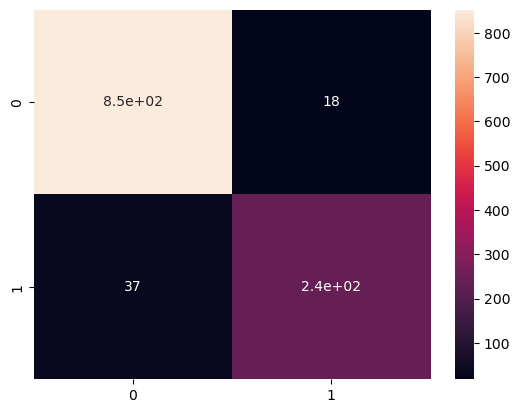

In [67]:
cm=confusion_matrix(y_test,y_predict_test_GNB)
sns.heatmap(cm,annot=True)

In [68]:
print(classification_report(y_test, y_predict_test_GNB))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       870
           1       0.93      0.87      0.90       276

    accuracy                           0.95      1146
   macro avg       0.94      0.92      0.93      1146
weighted avg       0.95      0.95      0.95      1146



## According to the heatmaps and reports, Multinomial NB is better than Gaussian to classify emails!